In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
import lightgbm as lgb

In [ ]:
import pandas as pd
import os
data_path = '/Users/favea/Downloads/swiss-data'

weather_files = [os.path.join(data_path,f) for f in os.listdir(data_path) if 'weather' in f]

cd2 = pd.read_csv(os.path.join(data_path,'10122022b_cleaned.csv'),index_col=0)

In [ ]:
cleaned_df = pd.read_csv(os.path.join(data_path,'12122022_cleaned.csv'),index_col=0)

In [ ]:
weather_files


In [ ]:
cleaned_df.columns

In [ ]:
df_weather = None
for wf in weather_files:
    print(wf)
    if df_weather is None:
        df_weather = pd.read_csv(wf)
        print(df_weather.shape)
    else:
        d = pd.read_csv(wf)
        print(d.shape)
        print('Appending')
        df_weather = df_weather.append(d)



In [ ]:
df_weather.columns

In [ ]:
merged = pd.merge(left = cleaned_df, right = df_weather, on = ['origin','destination','scheduled_time_departure'])

In [ ]:
merged.columns

In [ ]:
merged = merged.dropna().drop(['year','delay_minutes','scheduled_time_departure','Unnamed: 0'],axis=1)

without weather feature

In [ ]:
weather_features = ['temperature','precipitation', 'windSpeed', 'dewpoint', 'humidity']

In [ ]:
X,y = merged.drop('delayed',1), merged.loc[:,'delayed']

In [ ]:
X.columns

In [ ]:
X = X.drop(weather_features+['id_flight','carrier','ac_subtype','season_trip'],axis=1)
X.origin = X.origin.astype('category')
X.destination = X.destination.astype('category')
X.ac_registration_code = X.ac_registration_code.astype('category')



In [ ]:
seed = 7
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed, stratify=y)


model =LGBMClassifier(learning_rate=0.2,n_estimators=10_000, early_stopping_rounds=30)
gbm = model.fit(X_train, y_train, eval_set=(X_test,y_test), eval_metric ='average_precision') 




In [ ]:
lgb.plot_importance(gbm)

In [ ]:
lgb.plot_metric(gbm,'average_precision')

In [53]:
y_test_pred = gbm.predict(X_test, num_iteration = gbm.best_iteration_)
from sklearn.metrics import classification_report
print(classification_report(y_test, (y_test_pred>=0.5).astype(int)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       400
           1       0.95      0.75      0.84        72

    accuracy                           0.96       472
   macro avg       0.95      0.87      0.91       472
weighted avg       0.96      0.96      0.95       472



with weather feature

In [60]:
X,y = merged.drop('delayed',1), merged.loc[:,'delayed']
X = X.drop(['id_flight','carrier','ac_subtype','season_trip'],axis=1)

/var/folders/ps/6qbynsyd1595hzczgnjp7yn40000gn/T/ipykernel_85154/2652118517.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X,y = merged.drop('delayed',1), merged.loc[:,'delayed']


In [61]:
X.origin = X.origin.astype('category')
X.destination = X.destination.astype('category')
X.ac_registration_code = X.ac_registration_code.astype('category')

In [62]:
seed = 7
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed, stratify=y)

In [63]:

from lightgbm import LGBMClassifier
model = LGBMClassifier(learning_rate=0.2,n_estimators=10_000, early_stopping_rounds=30)
gbm = model.fit(X_train, y_train, eval_set=(X_test,y_test), eval_metric ='average_precision')


[LightGBM] [Warning] early_stopping_round is set=30, early_stopping_rounds=30 will be ignored. Current value: early_stopping_round=30


/Users/favea/miniconda3/envs/swiss/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/favea/miniconda3/envs/swiss/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[1]	valid_0's average_precision: 0.584324	valid_0's binary_logloss: 0.365633
[2]	valid_0's average_precision: 0.675082	valid_0's binary_logloss: 0.336112
[3]	valid_0's average_precision: 0.724272	valid_0's binary_logloss: 0.312946
[4]	valid_0's average_precision: 0.736453	valid_0's binary_logloss: 0.297177
[5]	valid_0's average_precision: 0.757799	valid_0's binary_logloss: 0.278253
[6]	valid_0's average_precision: 0.771002	valid_0's binary_logloss: 0.264599
[7]	valid_0's average_precision: 0.781719	valid_0's binary_logloss: 0.257473
[8]	valid_0's average_precision: 0.782511	valid_0's binary_logloss: 0.25136
[9]	valid_0's average_precision: 0.785211	valid_0's binary_logloss: 0.245313
[10]	valid_0's average_precision: 0.787453	valid_0's binary_logloss: 0.239389
[11]	valid_0's average_precision: 0.79168	valid_0's binary_logloss: 0.234262
[12]	valid_0's average_precision: 0.797874	valid_0's binary_logloss: 0.231541
[13]	valid_0's average_precision: 0.800964	valid_0's binary_logloss: 0.2290

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

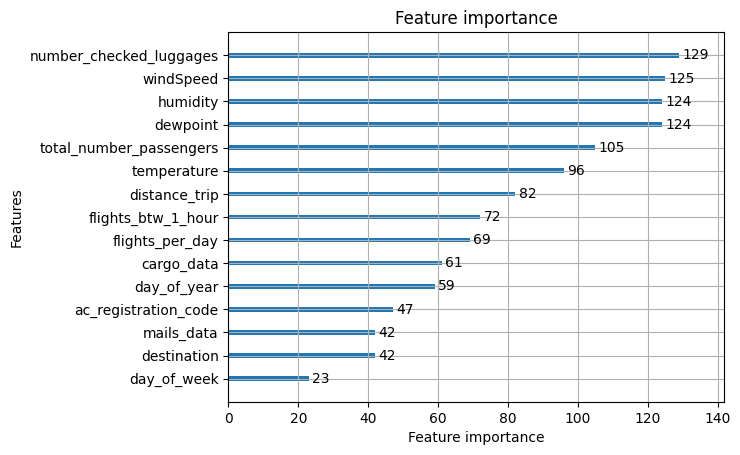

In [64]:
lgb.plot_importance(gbm)

<AxesSubplot: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='average_precision'>

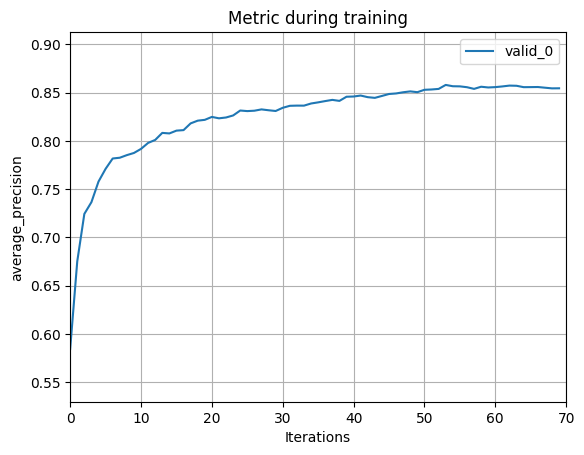

In [65]:
lgb.plot_metric(gbm,'average_precision')

In [66]:
y_test_pred = gbm.predict(X_test, num_iteration = gbm.best_iteration_)
from sklearn.metrics import classification_report
print(classification_report(y_test, (y_test_pred>=0.5).astype(int)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       400
           1       0.96      0.71      0.82        72

    accuracy                           0.95       472
   macro avg       0.96      0.85      0.89       472
weighted avg       0.95      0.95      0.95       472



In [67]:
y_test.shape

(472,)